## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2023-24 учебный год

## О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn, а также познакомитесь с plotly.

EDA - важный этап работы с данными. Именно в процессе EDA вы можете выяснить особенности датасета, найти зависимости в данных, протестировать гипотезы о взаимосвязях признаков и целевой переменной. В реальности вы сами будете определять, что и как проверять в рамках EDA, однако в данной работе гипотезы будут выдвинуты за вас автором задания. Также и типы графиков, которые вы будете использовать уже предопределены за вас. Выполняя задания по визуализациям, обращайте внимание на референсные картинки, которые были оставлены автором. Они показывают, какой примерно результат от вас ожидается.

Это задание будет включать в себя построение некоторого количества графиков, потому вот основные правила, в соответствии с которыми графики должны быть оформлены:
1. Любой график всегда имеет название.
2. Оси у графика подписаны (исключение - график делит название оси с соседним).
3. Подписи делаются на одном языке (либо английский, либо русский), но не на их смеси.
4. Если вы выводите несколько графиков, то они размещаются в рамках одного объекта matplotlib.pyplot.figure. Вы не выводите графики последовательно, а смотрите, как их разместить сразу все за раз.
5. Отдельные графики (если графиков на картинке больше 1) также имеют свои названия.
6. Если на графике есть несколько различных объектов, то для их различения используется легенда. Помещайте легенду в место, где она в наименьшей мере мешает восприятию самого графика.
7. Если есть легенда, то она должна иметь навание, а также ее содержание должно быть адекватными (пожалейте проверяющих, они не хотят разбирать, а к чему относится зеленая линия, которая на легенде помечена меткой "0").
8. Используйте цветовые гаммы, чтобы объекты на графиках отличались цветом.
9. Текст на визуализации должен быть читаем. Если вы вывели названия категорий в качестве подписей на оси Х, а эти названия наезжают друг на друга, то вам нужно что-то с этим сделать. Нечитаемый или плохо читаемый (очень маленький, невероятно огромный) текст ведет к снижению баллов.

*Тут правило про плагиат, которое вам итак известно - обнуляются все работы, которые подозреваются в некорректных заимствованиях!* Помните, что просто скопировать код из интернета и указать источник - это не ваша самостоятельная работа, а автора кода. Измените хоть что-нибудь в коде.

## О данных

Будем работать с [датасетом физической активности](https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones). 

В этом датасете собраны данные 30 человек, выполняющих различные действия со смартфоном на поясе. Данные записывались с помощью датчиков (акселерометра и гироскопа) в этом смартфоне. Были зафиксированы: "3-осевое линейное ускорение" (_tAcc-XYZ_) и "3-осевая угловая скорость" (_tGyro-XYZ_).

1. Все сигналы отсортированы по времени, пропущены через фильтр шума.
2. Все наблюдения были разделены на окна по 128 сигналов в каждом, причем окна пересекаются на 50% (грубо говоря, с 1 по 128 сигнал в 1 окно, с 64 до 192 сигнала - во 2 окно и так далее).
3. Линейное ускорение было разделено на две составляющие (с помощью низкочастотного фильтра): ускорение самого тела, а также гравитационная составляющая. Будем называть их ускорением тела и гравитационным ускорением.
4. К получившимся окнам применяли различные функции для получения следующих показателей:
    - max
    - min
    - mad (median)
    - mean
    - std
    - skewness (коэффициент асимметричности распределения признака в окне)
    - etc. (подробнее, на сколько это возможно, указано на [страничке датасета](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones))
5. Величина (magnitude) сигнала также определялась через евклидову норму всех значений из вектора для одного окна.
6. К окнам было применено преобразование Фурье, чтобы получить частоты. Из частот были извелченыте же показатели, плюс новые:
    - bandsEnergy (энергия частотного интервала)
7. Были посчитаны углы между векторами соответствующих окон.
8. Для ускорений были посчитаны производные - рывки, к которым применялись те же функции.

Итог: в датасете каждый признак - это какая-то операция над вектором из 128 чисел, которые соответствуют замерам определенного человека занятого какой-то активностью на протяжении 2.56 секунд.

Как читать названия признаков? Примеры:
- `tBodyAccMag-mean()` - это вектор ускорений тела (без гравитационной составляющей этого ускорения), из которого взяли евклидову норму, а затем усреднили, чтобы получить скаляр
- `fBodyAcc-bandsEnergy()-1,8.2` - это вектор ускорения тела, к которому применили преобразование Фурье, преобразовав его в вектор частот, а затем посчитали на этом векторе энергию данного частотного интервала в определенном диапазоне частот (в данном случае 1 - 8.2)
- `angle(X,gravityMean)` - это угол между осью Х и вектором усредненных значений гравитационного ускорения из соответствующего окна

Вероятно, сначала покажется сложным, но мы разберемся с некоторыми признаками в отдельности и вы сможете понять их смысл, уже исходя из фактических соотношений.

## Предобработка данных

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
ds = "https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones"

In [4]:
od.download(ds)

Skipping, found downloaded files in ".\human-activity-recognition-with-smartphones" (use force=True to force download)


In [5]:
import os

In [6]:
data_dir = ".\human-activity-recognition-with-smartphones"

In [7]:
os.listdir(data_dir)

['.ipynb_checkpoints']

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [9]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [10]:
train.shape

(7352, 563)

В датасете 563 признака, включая целевую переменную. Столько признаков нам не нужно. Мы за вас сделали подвыборку признаков для удобства работы с ними.

In [11]:
cols_subset = [
    'tBodyAccMag-mean()',  # усредненная величина ускорения тела
    'tBodyGyroJerk-mad()-X',  # медианная величина рывка тела по оси Х
    'tGravityAcc-min()-X',  # минимум гравитационной составляющей ускорения по оси Х
    'tBodyAcc-max()-X',  # максимальная величина ускорения тела по оси Х
    'fBodyAcc-bandsEnergy()-1,8.2',  # энергия ускорения тела в интервале частоты
    'angle(X,gravityMean)',  # угол между осью Х и усредненной гравитационной составляющей ускорения
    'angle(Y,gravityMean)',  # угол между осью Y и усредненной гравитационной составляющей ускорения
    'angle(Z,gravityMean)',  # угол между осью Z и усредненной гравитационной составляющей ускорения,
    'fBodyAcc-skewness()-X',  # асимметричность частоты ускорения тела по оси Х
    'subject',  # номер испытуемого
    'Activity',  # название вида деятельности (целевая переменная)
]

In [12]:
train = train[cols_subset]
test = test[cols_subset]

In [13]:
train.head()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
0           -0.959434              -0.992165             0.977436   
1           -0.979289              -0.989876             0.984520   
2           -0.983703              -0.987868             0.986770   
3           -0.986542              -0.991241             0.986821   
4           -0.992827              -0.992882             0.987434   

   tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
0         -0.934724                     -0.993592             -0.841247   
1         -0.943068                     -0.998235             -0.844788   
2         -0.938692                     -0.999388             -0.848933   
3         -0.938692                     -0.999807             -0.848649   
4         -0.942469                     -0.999806             -0.847865   

   angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  subject  \
0              0.179941             -0.058627               0.142051        1   
1              0.180289             -0.054317              -0.692541        1   
2              0.180637             -0.049118              -0.727227        1   
3              0.181935             -0.047663              -0.599118        1   
4              0.185151             -0.043892              -0.676997        1   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING

In [14]:
test.head()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
0           -0.866929              -0.910363             0.944461   
1           -0.968961              -0.968614             0.944461   
2           -0.976228              -0.983723             0.948704   
3           -0.974325              -0.983995             0.947309   
4           -0.975836              -0.988244             0.946221   

   tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
0         -0.894088                     -0.924705             -0.720009   
1         -0.894088                     -0.997186             -0.698091   
2         -0.939260                     -0.999083             -0.702771   
3         -0.938610                     -0.999171             -0.698954   
4         -0.938610                     -0.999355             -0.692245   

   angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  subject  \
0              0.276801             -0.057978              -0.571999        2   
1              0.281343             -0.083898              -0.918176        2   
2              0.280083             -0.079346              -0.384114        2   
3              0.284114             -0.077108              -0.635581        2   
4              0.290722             -0.073857              -0.507391        2   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING

### Задание 1 (0.5 балла)

Посмотрите на пропуски и дубли в данных train и test. Есть ли они? Если есть, напишите, с чем это может быть связано? Если нет, то просто напишите, что пропусков и/или дублей нет.

In [15]:
train.isnull().any().any() #пропусков в train нет

False

In [16]:
test.isnull().any().any() #пропусков в test нет

False

In [210]:
train[train.duplicated()].any().any() #дублей в train нет

False

In [211]:
test[test.duplicated()].any().any() #дублей в test нет

False

### Задание 2 (0.5 балла)

Выведите основные статистики данных: среднее, медиана, перцентили (0.25, 0.5, 0.75), минимум, максимум, стандартное отклонение. Посмотрите на таблицу и напишите, видите ли вы в ней что-нибудь интересное.

In [133]:
train.drop("subject", axis=1).describe() #удалим столбец subject из описания, т.к. он не будет иметь семантического смысла

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
count         7352.000000            7352.000000          7352.000000   
mean            -0.543884              -0.727735             0.678505   
std              0.477653               0.315832             0.508656   
min             -1.000000              -0.999889            -1.000000   
25%             -0.983282              -0.991595             0.804270   
50%             -0.883371              -0.950268             0.926693   
75%             -0.106892              -0.474625             0.965095   
max              1.000000               1.000000             1.000000   

       tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
count       7352.000000                   7352.000000           7352.000000   
mean          -0.468604                     -0.847963             -0.489547   
std            0.544547                      0.233633              0.511807   
min           -1.000000                     -1.000000             -1.000000   
25%           -0.936219                     -0.999480             -0.812065   
50%           -0.881637                     -0.986582             -0.709417   
75%           -0.017129                     -0.764508             -0.509079   
max            1.000000                      1.000000              1.000000   

       angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  
count           7352.000000           7352.000000            7352.000000  
mean               0.058593             -0.056515              -0.128562  
std                0.297480              0.279122               0.403686  
min               -1.000000             -1.000000              -0.931208  
25%               -0.017885             -0.143414              -0.486841  
50%                0.182071              0.003181              -0.163271  
75%                0.248353              0.107659               0.155112  
max                0.478157              1.000000               1.000000

In [ ]:
'''
Данные принимают значения от -1 до 1
Данные довольно сильно отклоняются от среднего значения, вероятно наличие выбросов
Максимальные значения для всех параметров кроме angle(Y,gravityMean) = 1
'''

In [134]:
test.drop("subject", axis=1).describe()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
count         2947.000000            2947.000000          2947.000000   
mean            -0.559043              -0.735661             0.696878   
std              0.439539               0.282074             0.502873   
min             -0.998936              -1.000000            -0.756774   
25%             -0.978433              -0.989078             0.836787   
50%             -0.861830              -0.914698             0.934930   
75%             -0.149596              -0.486423             0.970871   
max              0.479547               0.117606             0.996148   

       tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
count       2947.000000                   2947.000000           2947.000000   
mean          -0.462063                     -0.880361             -0.513923   
std            0.523916                      0.160496              0.509205   
min           -0.952357                     -0.999989             -0.984195   
25%           -0.934447                     -0.999330             -0.829722   
50%           -0.852659                     -0.979336             -0.729648   
75%           -0.009965                     -0.799113             -0.545939   
max            0.786436                      0.048730              0.833180   

       angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  
count           2947.000000           2947.000000            2947.000000  
mean               0.074886             -0.048720              -0.154042  
std                0.324300              0.241467               0.392203  
min               -0.913704             -0.949228              -1.000000  
25%                0.022140             -0.098485              -0.497070  
50%                0.181563             -0.010671              -0.202050  
75%                0.260252              0.092373               0.140254  
max                1.000000              0.973113               0.960367

### Задание 3 (0.5 балла)

Данные сбалансированы? У вас есть 6 категорий активности (целевая переменная). Если одна из категорий представлена большим количеством наблюдений, а остальные - нет, то это обстоятельство, о котором хотелось бы знать заранее. Гиперболизированный пример: представьте, что у вас 1000 наблюдений, разделенных на два класса, и только 5 принадлежат ко второму классу. Как учить модель на такой выборке? Есть сильное подозрение, что многие модели будут склонны вырождаться в константу. Отсюда и необходимость проверять баланс классов.

Выведите количество наблюдений для всех категорий активности в train и test. Посчитайте разницу в процентах между самой крупной категорией и самой маленькой (самая большая категория - это 100%). Если разница (округленная до ближайшего целого числа) не превышает 30%, то давайте для наших целей считать, что данные сбалансированы. Напишите, сбалансированы ли данные в train и test.

In [21]:
train_activities = train.groupby("Activity").size()
train_activities

Activity
LAYING                1407
SITTING               1286
STANDING              1374
WALKING               1226
WALKING_DOWNSTAIRS     986
WALKING_UPSTAIRS      1073
dtype: int64

In [22]:
(max(train_activities) - min(train_activities)) / max(train_activities) # не превышает 30%

0.2992181947405828

In [23]:
test_activities = test.groupby("Activity").size()
test_activities

Activity
LAYING                537
SITTING               491
STANDING              532
WALKING               496
WALKING_DOWNSTAIRS    420
WALKING_UPSTAIRS      471
dtype: int64

In [24]:
(max(test_activities) - min(test_activities)) / max(test_activities) # не превышает 30%

0.21787709497206703

In [25]:
#Данные сбалансированы и для train, и для test

### Задание 4 (0.5 балла)

Посчитайте корреляции всех признаков (включая таргет) со всеми другими. Какими получились значения? Есть идеи, почему так? Напишите ваши мысли.

In [136]:
train.drop("Activity", axis=1).drop("subject", axis=1).corr() #activity - категориальная

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  \
tBodyAccMag-mean()                      1.000000               0.899080   
tBodyGyroJerk-mad()-X                   0.899080               1.000000   
tGravityAcc-min()-X                     0.369962               0.380118   
tBodyAcc-max()-X                        0.959827               0.879900   
fBodyAcc-bandsEnergy()-1,8.2            0.697832               0.507939   
angle(X,gravityMean)                   -0.370849              -0.382246   
angle(Y,gravityMean)                    0.495561               0.478567   
angle(Z,gravityMean)                    0.426283               0.380967   
fBodyAcc-skewness()-X                   0.379796               0.266002   

                              tGravityAcc-min()-X  tBodyAcc-max()-X  \
tBodyAccMag-mean()                       0.369962          0.959827   
tBodyGyroJerk-mad()-X                    0.380118          0.879900   
tGravityAcc-min()-X                      1.000000          0.380404   
tBodyAcc-max()-X                         0.380404          1.000000   
fBodyAcc-bandsEnergy()-1,8.2             0.239088          0.613383   
angle(X,gravityMean)                    -0.988663         -0.384192   
angle(Y,gravityMean)                     0.797116          0.480229   
angle(Z,gravityMean)                     0.667415          0.405023   
fBodyAcc-skewness()-X                   -0.261676          0.335708   

                              fBodyAcc-bandsEnergy()-1,8.2  \
tBodyAccMag-mean()                                0.697832   
tBodyGyroJerk-mad()-X                             0.507939   
tGravityAcc-min()-X                               0.239088   
tBodyAcc-max()-X                                  0.613383   
fBodyAcc-bandsEnergy()-1,8.2                      1.000000   
angle(X,gravityMean)                             -0.213318   
angle(Y,gravityMean)                              0.363170   
angle(Z,gravityMean)                              0.423927   
fBodyAcc-skewness()-X                             0.260316   

                              angle(X,gravityMean)  angle(Y,gravityMean)  \
tBodyAccMag-mean()                       -0.370849              0.495561   
tBodyGyroJerk-mad()-X                    -0.382246              0.478567   
tGravityAcc-min()-X                      -0.988663              0.797116   
tBodyAcc-max()-X                         -0.384192              0.480229   
fBodyAcc-bandsEnergy()-1,8.2             -0.213318              0.363170   
angle(X,gravityMean)                      1.000000             -0.783848   
angle(Y,gravityMean)                     -0.783848              1.000000   
angle(Z,gravityMean)                     -0.643655              0.594885   
fBodyAcc-skewness()-X                     0.265523             -0.046213   

                              angle(Z,gravityMean)  fBodyAcc-skewness()-X  
tBodyAccMag-mean()                        0.426283               0.379796  
tBodyGyroJerk-mad()-X                     0.380967               0.266002  
tGravityAcc-min()-X                       0.667415              -0.261676  
tBodyAcc-max()-X                          0.405023               0.335708  
fBodyAcc-bandsEnergy()-1,8.2              0.423927               0.260316  
angle(X,gravityMean)                     -0.643655               0.265523  
angle(Y,gravityMean)                      0.594885              -0.046213  
angle(Z,gravityMean)                      1.000000              -0.183815  
fBodyAcc-skewness()-X                    -0.183815               1.000000

In [135]:
'''
Все значения принадлезат отрезку от -1 до 1. По диагонали у нас стоят 1, т.к. это корелляция признака с этим же признаком.

Можно заметить высокую корелляционную связь между такими признаками как 
1. "tBodyAccMag-mean()" и "tBodyAcc-max()-X" - оба  отвечают за ускорение тела
2. "tBodyAccMag-mean()" и "tBodyGyroJerk-mad()-X" - прямая корреляция, т.к. от рывка зависит ускорение
3. "Угол между осями X, Y и Z и усредненной гравитационной составляющей ускорения" и 
"минимум гравитационной составляющей ускорения по оси Х" (причем с осями Y и Z связь прямая, 
а с X обратная(т.к чем больше угол, тем меньше гравитационная составляющая ускорения)) 

Между остальными признаками менее значимая кореляционная зависимость.
'''

'\nВсе значения принадлезат отрезку от -1 до 1. По диагонали у нас стоят 1, т.к. это корелляция признака с этим же признаком.\n'

Поздравляем! Вы предобработали данные для максимально комфортного их последующего анализа. Теперь вы готовы приступить к Exploratory Data Analysis!

## Exploratory Data Analysis

### Задание 5 (0.5 балла)

Вы проверили основную информацию о данных и составили свое первое впечатление о них. Теперь визуализации.

Начнем рисовать графики с небольшой разминки. Выберите две любые математические функции (отличные от линейной) и нарисуйте их на одном графике. Подпишите каждый из графиков, чтобы было понятно, какие функции вы выбрали. Ниже будет пример.

In [27]:
x = np.linspace(-100, 100, 1000)
y1 = x ** 2
y2 = np.log10(x)

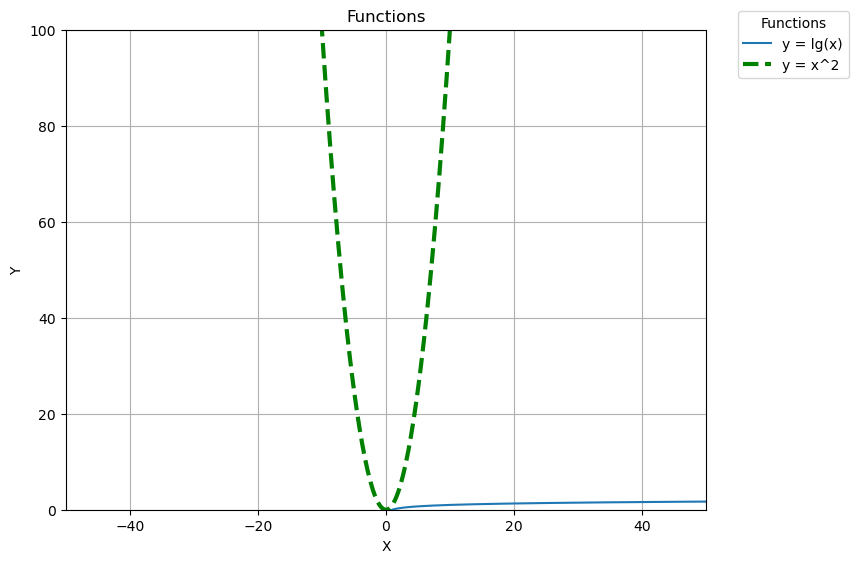

In [137]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, y2, label="y = lg(x)")
ax.plot(x, y1, label="y = x^2", color="green", lw=3, ls="--")

ax.set_xlim(-50, 50)
ax.set_ylim(0, 100)

plt.legend(loc=(1.05,0.9), title="Functions")
plt.title("Functions")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()

plt.show()

### Задание 6 (0.5 балла)

Ранее мы уже проверили сбалансированность данных по разным категориям активностей в train и test сетах. Теперь визуализируйте количество сэмплов в каждой из категорий отдельно для train и test сетов, как в примере ниже. Проследите, чтобы порядок категорий слева и справа был одинаков. Иначе не очень удобно их сравнивать (когда они в разных местах двух графиков). Также заметьте, что в примере ось Х в одинаковом масштабе, что тоже удобно для сравнения.

Вам может пригодиться:
- plt.barh или ax.barh

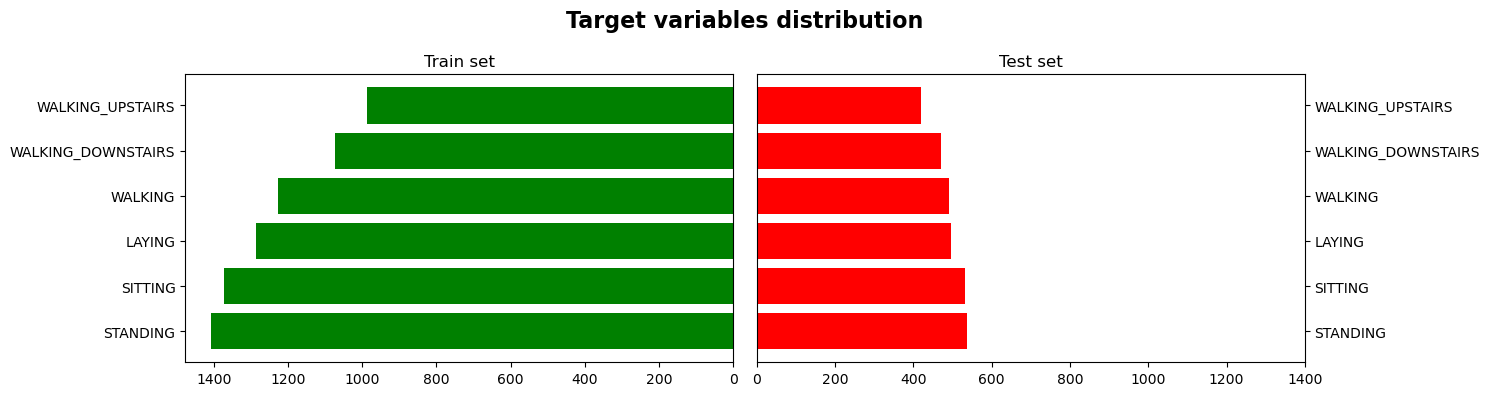

In [29]:
train_act = train["Activity"].unique()
train_act_size = train["Activity"].value_counts()

test_act = test["Activity"].unique()
test_act_size = test["Activity"].value_counts()

fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize=(15, 4)) #создаем сетку для графиков
fig.suptitle('Target variables distribution', fontsize=16, fontweight="bold") #добавляем заголовок

axs[0].barh(train_act, train_act_size, color="green") #создаем график
axs[0].invert_xaxis() #переворачиваем
axs[0].set_title("Train set") #добавляем заголовок

axs[1].barh(test_act, test_act_size, color="red") #создаем график
axs[1].set_xlim(0, 1400) #настраиваем одинаковый масштаб
axs[1].yaxis.tick_right() #переворачиваем названия
axs[1].set_title("Test set") #добавляем заголовок

fig.tight_layout() #чтобы графики не пересекались
plt.show()

Правда на таких графиках проще проверять баланс классов таргета?)

### Задание 7 (0.5 балла)

Ранее вы выводили таблицу корреляций. Однако просто таблица корреляций не очень удобна для анализа. Что, если признаков было бы больше? Визуализируйте heatmap корреляций. Подпишите значения корреляций, округленные до 2 знаков после запятой, на графике и оставьте только те значения, которые по модулю не меньше 0.5. Будем считать такие корреляции существенными. Если будете брать код из семинарского ноутбука, то поменяйте в нем что-нибудь, например, цветовую гамму, иначе проверяющий будет карать :)

Какой признак стоит исключить из рассмотрения корреляций? Напишите его название, а также причину, почему нет смысла его рассматривать. 

Вам может пригодиться:
- sns.heatmap
- методы get_text и set_text у атрибута texts графика

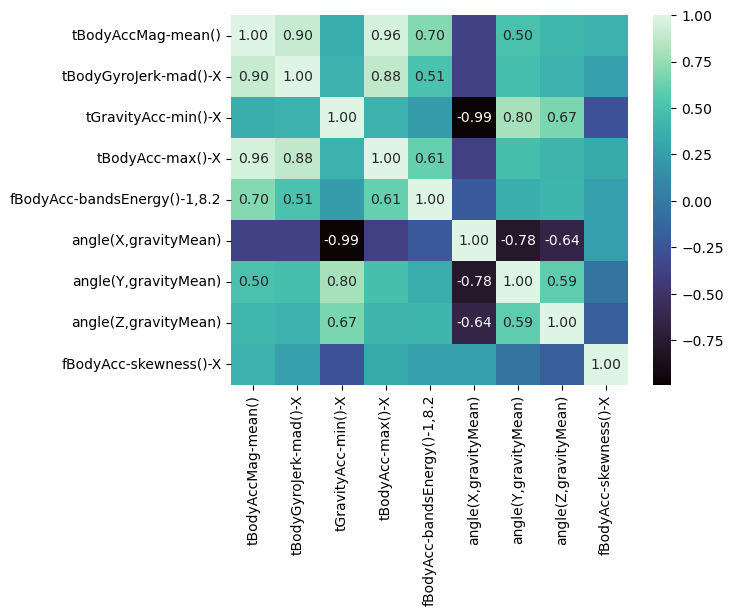

In [138]:
ax = sns.heatmap(train.drop("Activity", axis=1).drop("subject", axis=1).corr(), cmap="mako", annot=True, fmt="0.2f")
for t in ax.texts:
    if abs(float(t.get_text())) >= 0.5:
        t.set_text(t.get_text())
    else:
        t.set_text("")

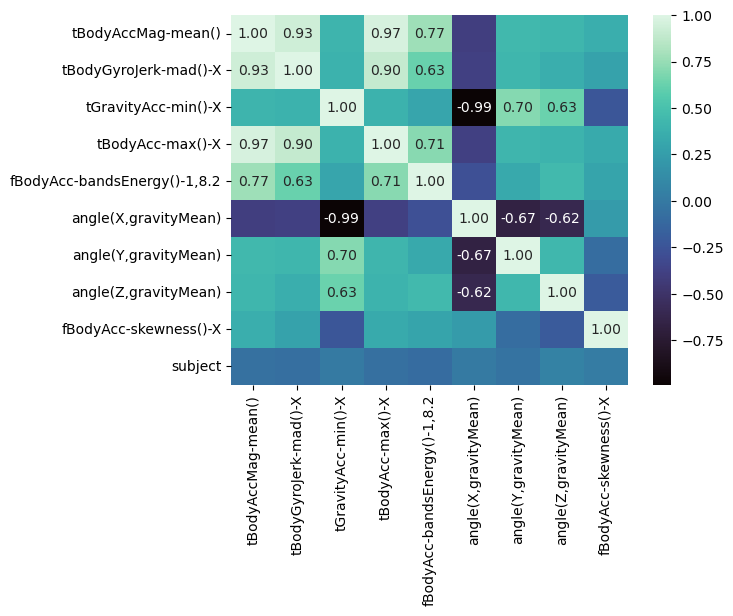

In [139]:
ax = sns.heatmap(test.drop("Activity", axis=1).corr().drop("subject", axis=1), cmap="mako", annot=True, fmt="0.2f")
for t in ax.texts:
    if abs(float(t.get_text())) >= 0.5:
        t.set_text(t.get_text())
    else:
        t.set_text("")

In [ ]:
'''
Перед построением тепловой карты были удалены такие признаки как
тип активности и номер испутуемого. Тип активности - категориальный признак,
который просто невозможно вписать в тепловую карту. Номер испытуемого также стоит
исключить из рассмотрения, т.к. нет смысла искать зависимость между номером испытуемого
(порядковый признак) и другими количественными непрерывными величинами.
'''

### Задание 8 (0.5 балла)

Для начала будем стрелять из пушки по воробьям. Выведите pairplot по всем данным train сета. Напишите, заметили ли вы в нем что-нибудь интересное, чего не было в таблицах и графиках ранее, а также сообщите, было ли вам удобно анализировать 100 графиков. 

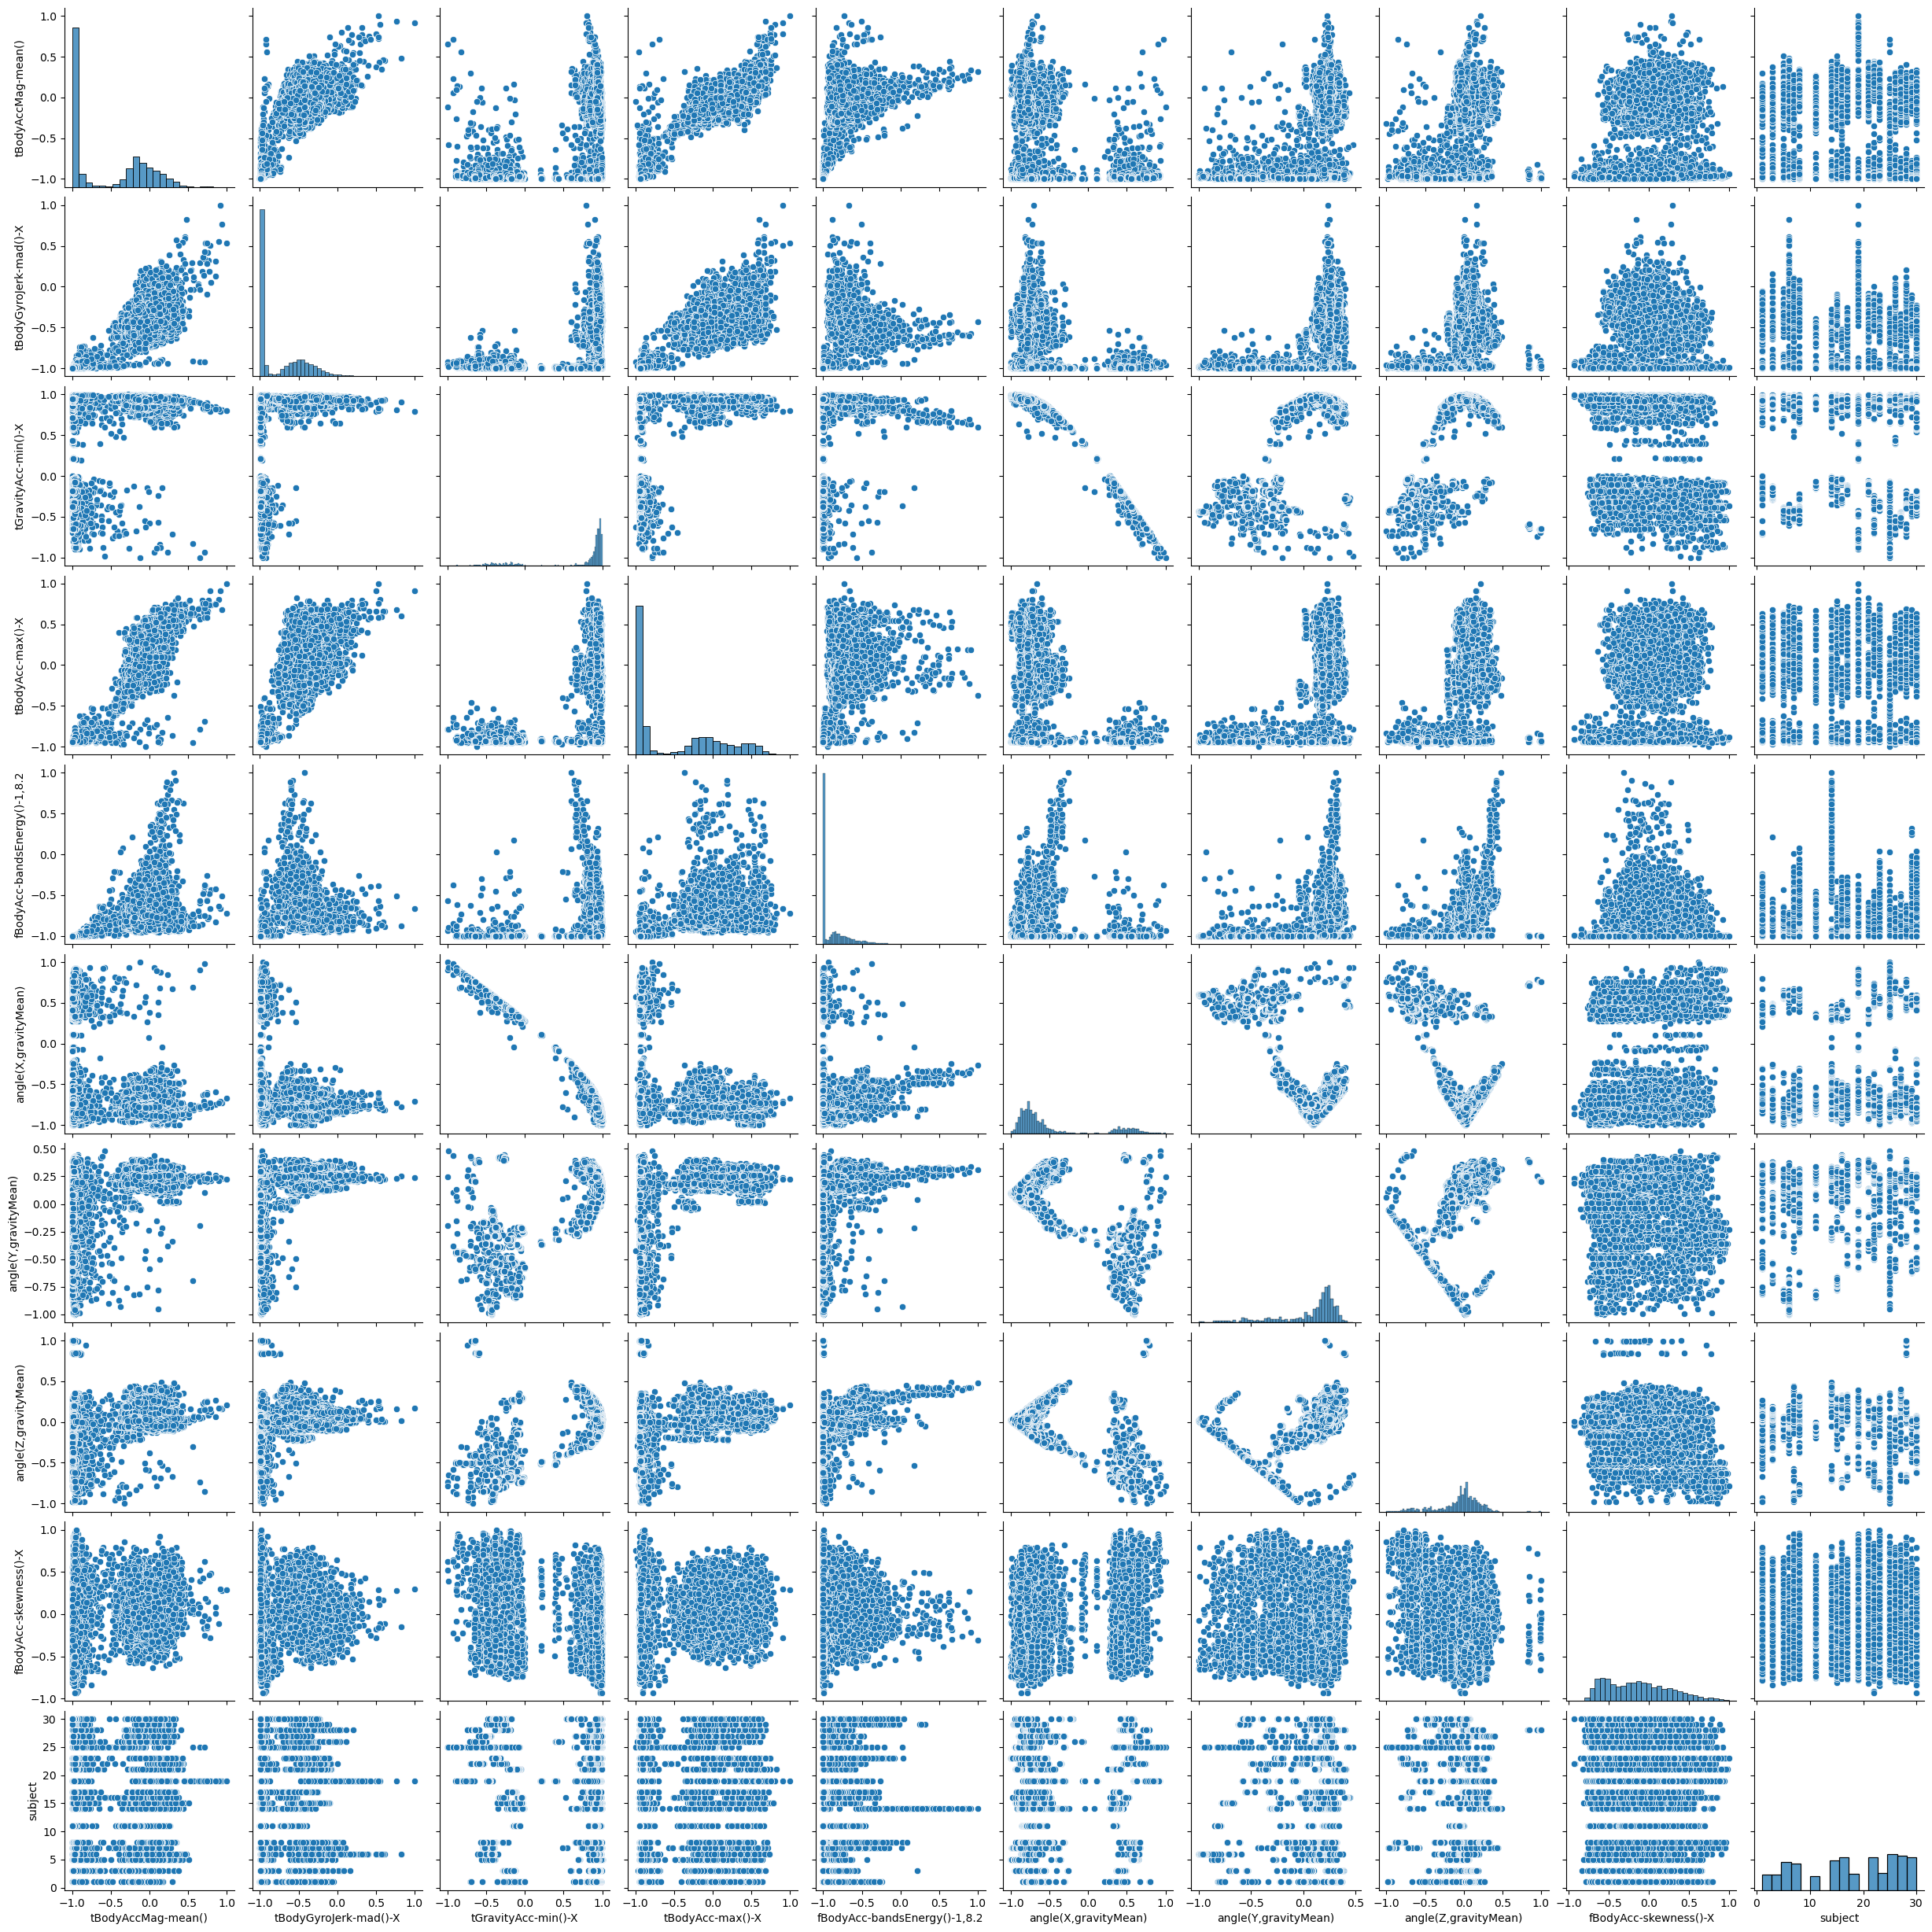

In [32]:
sns.pairplot(train)

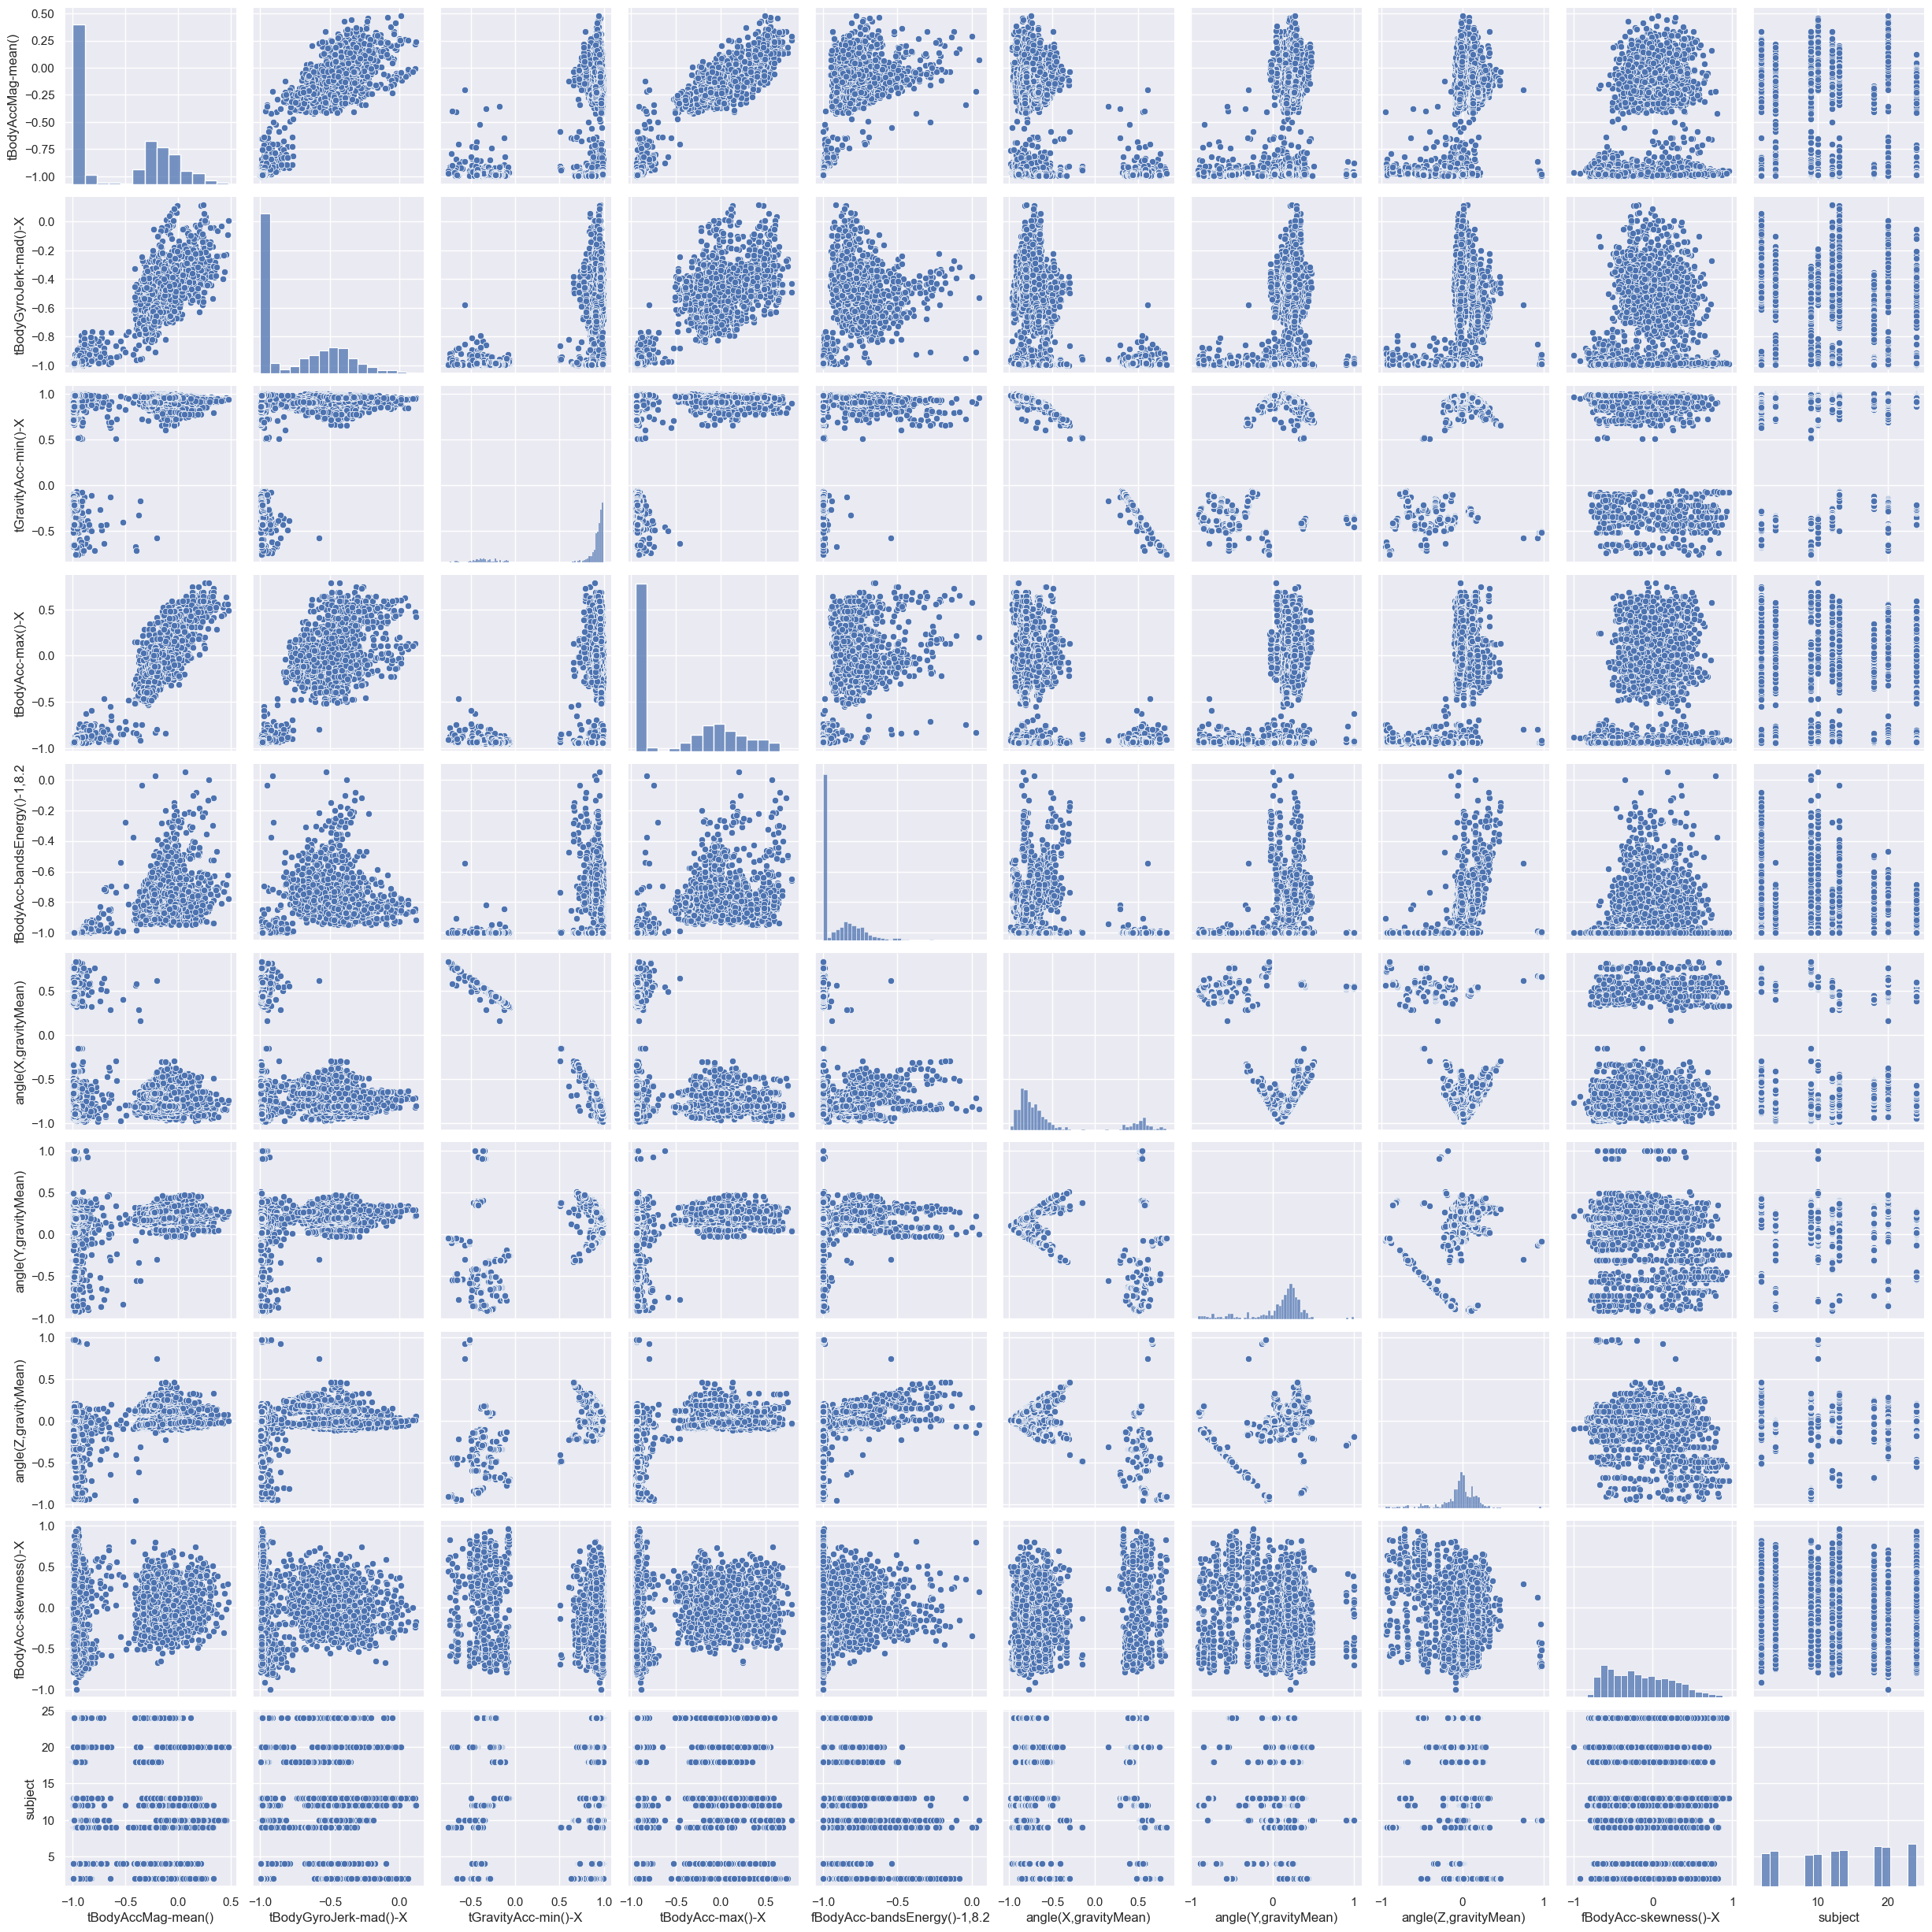

In [243]:
sns.pairplot(test)

In [ ]:
'''
Построение pairplot, особенно для такого количества признаков,
не имеет смысла, т.к. рассмотреть что-либо в такой форме практически невозожно.
Мне не очень удобно анализировать сразу 100 графиков :)

Можно попробовать рассмотреть на вид некоторые функции, но кореляционную зависимость и основные параметры
было в любом случае удобнее смотреть способами, представленными в предыдущих заданиях
'''

### Задание 9 (1 балл)

Окей. Смотреть на все сразу не очень удобно. Кажется, нужно смотреть на признаки в отдельности и искать в них инсайты.

Попробуем проверить гипотезу. Отобразите плотность распределения (kde) `tBodyAccMag-mean()` для каждой из активностей, как в примере ниже. Видите закономерность? Можно ли поделить все активности на две группы? Если да, то проведите вертикальную линию, которая визуально неплохо разделяет эти группы. 

Давайте первую группу называть статическими активностями, а вторую - динамическими.

Посчитайте, какую долю правильных ответов дает ваша вертикальная линия для разделения именно этих двух групп. С чем может быть связан полученный вами результат? Предположите логическое обоснование (почему именно данный признак так хорошо/плохо разделяет группы активностей).

Вам может пригодиться:
- sns.kdeplot

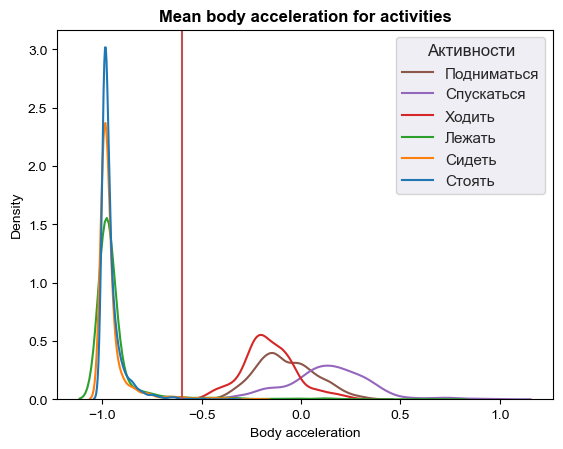

In [150]:
ax = sns.kdeplot(data=train,x='tBodyAccMag-mean()', hue="Activity")
ax.set(xlabel='Body acceleration')
sns.set(rc={'figure.figsize':(10, 5)})
plt.legend(title='Активности', labels=['Подниматься', 'Спускаться', 'Ходить', 'Лежать', 'Сидеть', 'Стоять'])
plt.title("Mean body acceleration for activities", fontweight="bold")
plt.axvline(-0.6, color='r')
plt.show()

In [ ]:
'''
Можно заметить, что усредненная величина ускорения тела находится либо в окрестности -1, либо окрестности 0.
Можно выдвинуть гипотезу, что по данному признаку можно разделить данные на статические и динамические.
Визуально разделим данные на две группы от -1 до -0.6 (статические) и от -0.6 до 1 (динамические).
'''

In [156]:
static_predict = train[train['tBodyAccMag-mean()'] >= -0.6] #сатические по гипотезе
dynamic_predict = train[train['tBodyAccMag-mean()'] < -0.6] #динамические по гипотезе

dynamic_predict_true = static_predict.loc[static_predict['Activity']. isin(train["Activity"].unique()[3:])] #подтвердились
static_predict_true = dynamic_predict.loc[dynamic_predict['Activity']. isin(train["Activity"].unique()[:3])]

dynamic = train.loc[train['Activity']. isin(train["Activity"].unique()[3:])]
static = train.loc[train['Activity']. isin(train["Activity"].unique()[:3])]

print(len(dynamic_predict_true) / len(dynamic)) #доли
print(len(static_predict_true) / len(static))

1.0
0.9810671256454389


In [ ]:
'''
Данный показатель дает почти 100% долю верных ответов.
Это связано с тем, что вид активности непосредственно влияет на ускорение тела
Логично предположить, что при статические и динамические активности легко разделить
по данной метрике
'''

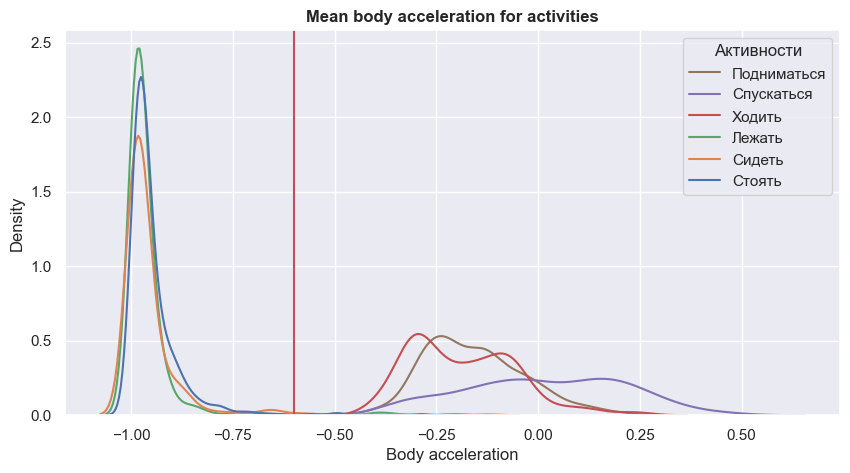

In [244]:
ax = sns.kdeplot(data=test,x='tBodyAccMag-mean()', hue="Activity")
ax.set(xlabel='Body acceleration')
sns.set(rc={'figure.figsize':(10, 5)})
plt.legend(title='Активности', labels=['Подниматься', 'Спускаться', 'Ходить', 'Лежать', 'Сидеть', 'Стоять'])
plt.title("Mean body acceleration for activities", fontweight="bold")
plt.axvline(-0.6, color='r')
plt.show()

### Задание 10 (0.5 балла)

Поздравляем, вы проверили первую гипотезу в процессе EDA. Однако нам бы хотелось уметь не группы разделять, а каждый отдельный вид активности. Попробуйте нарисовать "ящики с усами" для `angle(X,gravityMean)` с разделением по разным видам активности на данных train. Можно ли сделать какой-то вывод по полученной визуализации? Проанализируйте и проинтерпретируйте полученные картинки (если заметили какую-то особенность, может какая-то категория значительно выделяется, то предположите, почему так могло произойти).

Вам может пригодиться:
- sns.boxplot

Text(0.5, 1.0, 'Angle between X-axis and gravitatioanl acceleration')

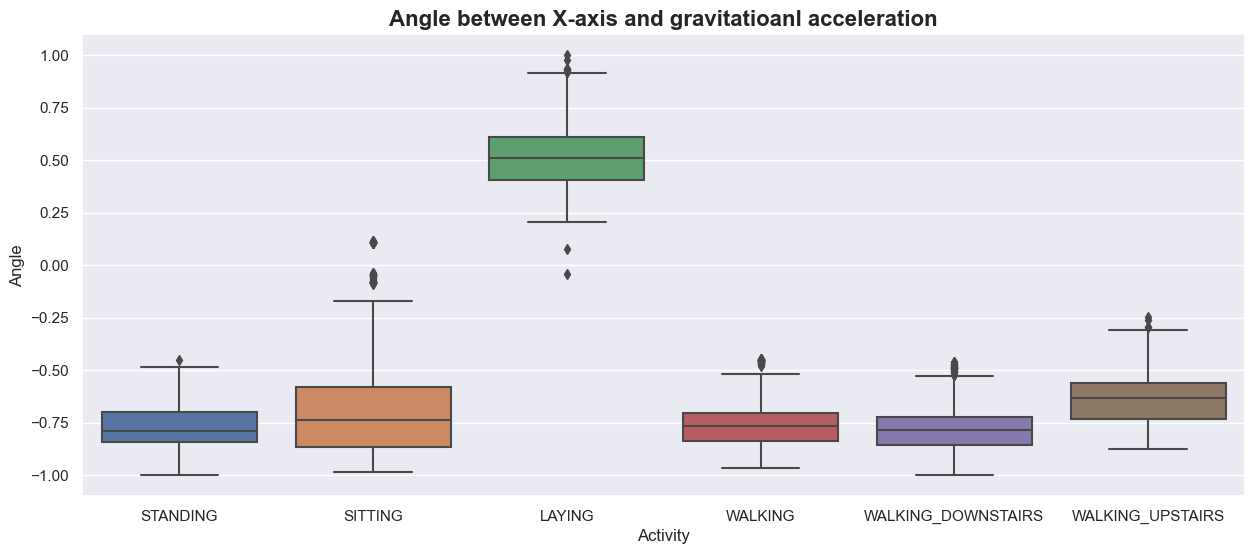

In [71]:
plt.figure(figsize=(15,6))
sns.boxplot(data=train, x=train["Activity"], y="angle(X,gravityMean)")
plt.ylabel("Angle")
plt.title("Angle between X-axis and gravitatioanl acceleration", fontsize=16, fontweight="bold")

In [ ]:
'''
Самая выделяющаяся категория - это положение лежа.
Для него самый большой медианный показатель для угла между осью Х и усредненной гравитационной составляющей ускорения.
Полагаю, это связано с горизонтальным положением тела.

Также можно заметить, что в категориях сидеть и лежать больше всего выбросов (нетипичных значений).
Предположу, что это связано с вариативностью положения тела во время данных активностей. 
Можно заметить, что сидение иногда приближается к лежанию, и наоборот.

Вывод будем искать laying по "angle(X,gravityMean)" в отрезке 0.25 до 1
'''

Text(0.5, 1.0, 'Angle between X-axis and gravitatioanl acceleration')

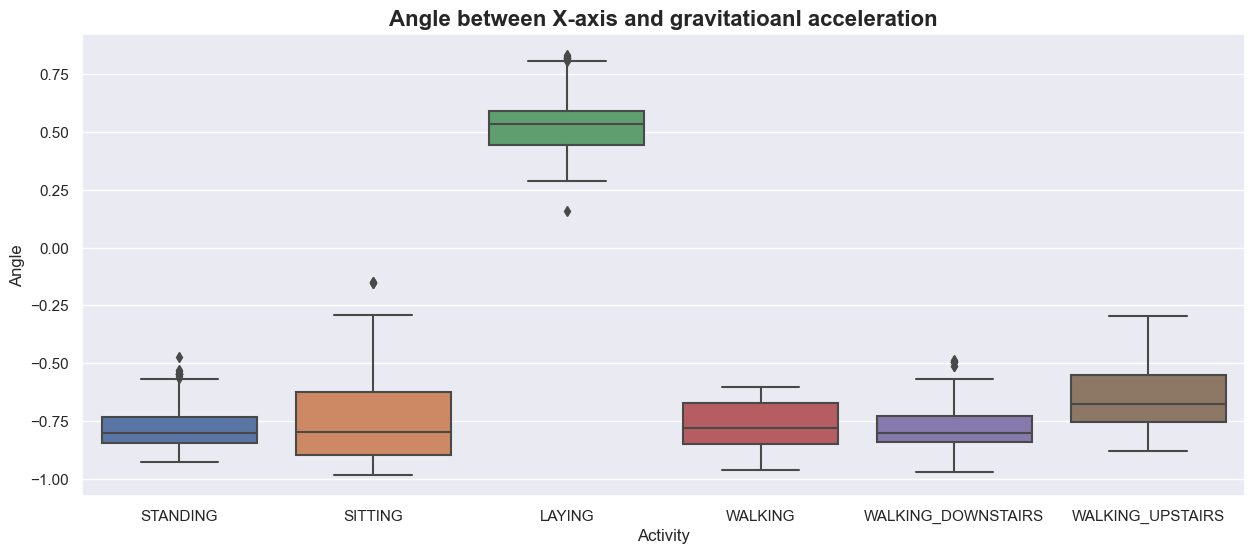

In [247]:
plt.figure(figsize=(15,6))
sns.boxplot(data=test, x=test["Activity"], y="angle(X,gravityMean)")
plt.ylabel("Angle")
plt.title("Angle between X-axis and gravitatioanl acceleration", fontsize=16, fontweight="bold")

### Задание 11 (0.5 балла)

Посмотрим теперь на `tBodyAcc-max()-X`. Визуализируйте скрипичные диаграммы для этого признака с разделением по активностям на всем train. Кажется логичным, что максимальное ускорение в моменте для разных активностей будет различаться. Однако есть ли активность, которая будет выделяться? Если да, то предложите объяснение, почему эта активность выделяется.

Вам может пригодиться:
- sns.violinplot

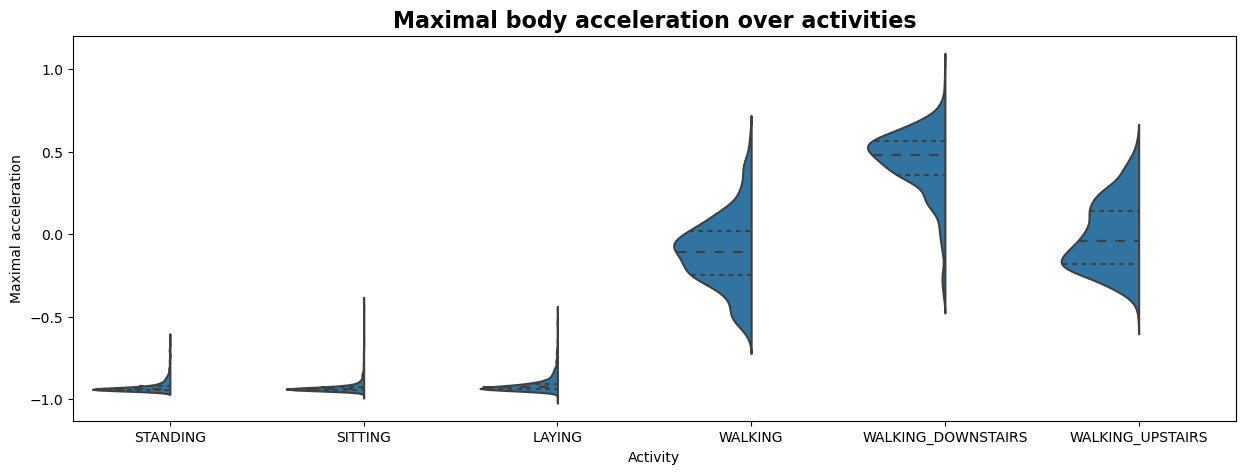

In [62]:
plt.figure(figsize=(15, 5))
ax = sns.violinplot(x=train["Activity"], y='tBodyAcc-max()-X', data=train, split=True, inner="quartile", hue=True,
    hue_order=[True, False])
plt.ylabel("Maximal acceleration")
plt.title("Maximal body acceleration over activities", fontsize=16, fontweight="bold")
ax.legend_ = None
plt.show()

In [ ]:
'''
Очевидно, что максимальное ускорение для динамических и статических признаков сильно отличается.
При статических активностях, оно почти отсутствует.
Из динамических активностей отличительной является walking downstairs, в то время как walking и walking upstairs 
почти не отличаются.
Предположу, что при хождении вниз, человеку легче разгоняться из-за наклонной поверхности, поэтому 
ускорение при данном виде ходьбы выше.

Вывод: будем искать walking downstairs по 'tBodyAcc-max()-X' в промежутке от 0.3 до 1
'''

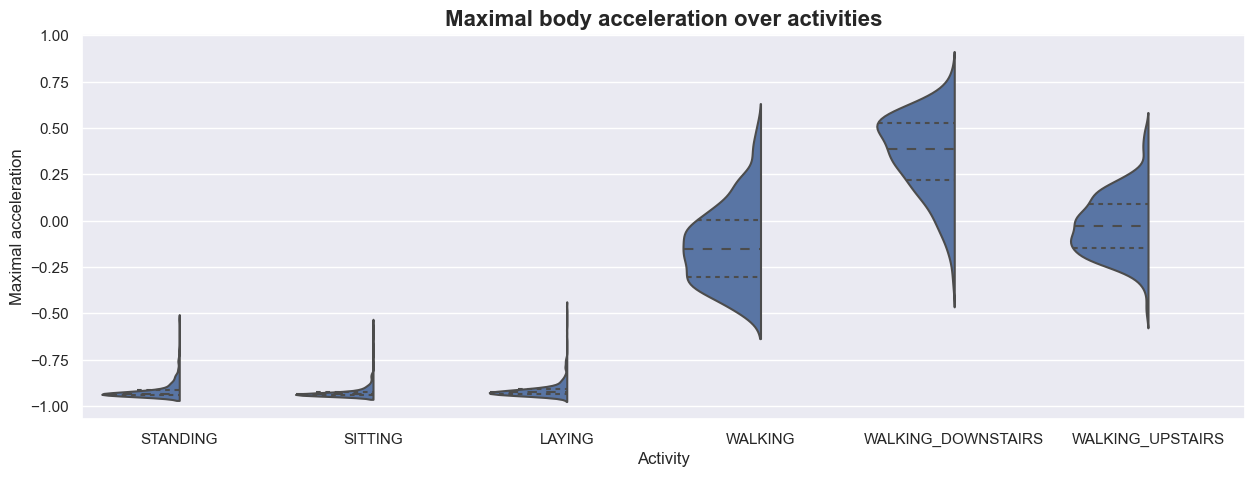

In [250]:
plt.figure(figsize=(15, 5))
ax = sns.violinplot(x=test["Activity"], y='tBodyAcc-max()-X', data=test, split=True, inner="quartile", hue=True,
    hue_order=[True, False])
plt.ylabel("Maximal acceleration")
plt.title("Maximal body acceleration over activities", fontsize=16, fontweight="bold")
ax.legend_ = None
plt.show()

### Задание 12 (1 балл)

Вы уже можете с довольно хорошим качеством выделить две категории активности из шести. Продолжим. 

Ранее уже упоминалось разделение на две группы активностей: статические и динамические. Пришла пора разделить датасет train на две части. Сделайте это! Теперь на одной картинке покажите распределения `fBodyAcc-bandsEnergy()-1,8.2` для динамичных активностей (boxenplot - немного измененый "ящик с усами") и `angle(Y,gravityMean)` для статических - тут хватит и простой гистограммы (прямо, как в примере ниже). Можно ли выделить еще какие-то активности? Если да, напишите, какие активности на 1 и 2 графиках выделяются.

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec (заметили, что один график больше другого? попробуйте сами так сделать - вам понравится...)
- sns.boxenplot
- sns.histplot

In [69]:
import matplotlib.gridspec as gs

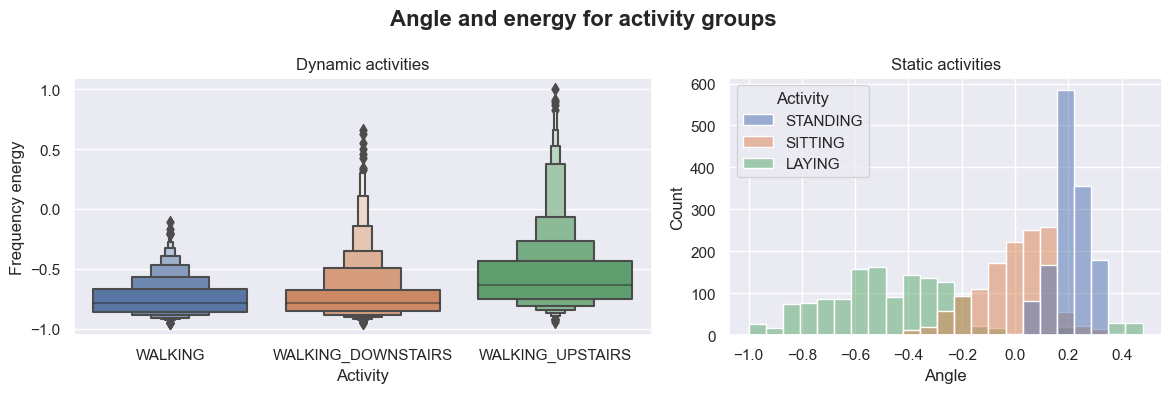

In [174]:
static = train.loc[train['Activity']. isin(train["Activity"].unique()[:3])]
dynamic = train.loc[train['Activity']. isin(train["Activity"].unique()[3:])]

fig, axs = plt.subplots(1, 2, figsize=(12,4), gridspec_kw={'width_ratios': [2, 1.5]}) #создаем сетку для графиков
fig.suptitle('Angle and energy for activity groups', fontsize=16, fontweight="bold") #добавляем заголовок

ax = axs[0]
ax= sns.boxenplot(x="Activity", y="fBodyAcc-bandsEnergy()-1,8.2", data=dynamic, ax=ax)
ax.set(ylabel='Frequency energy', title="Dynamic activities")
ax = axs[1]
ax= sns.histplot(hue="Activity", x="angle(Y,gravityMean)", data=static, ax=ax)
ax.set(xlabel='Angle', title="Static activities")

fig.tight_layout()
plt.show()

In [ ]:
'''
1. При хождении вверх средняя энергия выше и для нее выше разброс. Это связано, с тем, что такая активность
требует большей физической подготовки.

2. Про статические виды нагрузок можно сказать, что угол относительно Y самый низкий для положения лежа,
становится выше для положения сидя и для положения стоя самый высокий. Так же стоит заметить, что
разброс для положений лежа и сидя варьируется и пересекается (связано, как упомянуто выше, с вариантами положения тела),
в то время как для положения стоя почти все испытуемые показали одинаковые значения.

Вывод: будем искать standing по angle(Y,gravityMean) в промежутке от 0.05 до  0.35
будем искать walking upstairs по fBodyAcc-bandsEnergy()-1,8.2 в промежутке от 0.35 и выше
'''

### Задание 13 (0.5 балла)

Не всегда жизнь будет такой легкой, а данные будут полностью или почти линейно разделимы в одному признаку (иначе чем бы занимались дата саентисты...). Часто данные вообще ни по одному признаку нельзя адекватно разделить (да и по комбинациям признаков тоже). Давайте попробуем взять не один признак, а целых два! 

Рассмотрим только статические активности. Будет снова два графика сразу. На первом графике будет боксплот распределения `fBodyAcc-skewness()-X` по активностям. А на втором попробуем взять не все наблюдения данной группы активностей, а только их часть. Разделимы ли категории по `fBodyAcc-skewness()-X`? А если взять только те строки, где `fBodyAcc-skewness()-X < -0.376`, и теперь вывести боксплот распределения `angle(Y,gravityMean)` по разным активностям? Попробуйте и напишите, выделилась ли какая-то категория? 

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.boxplot

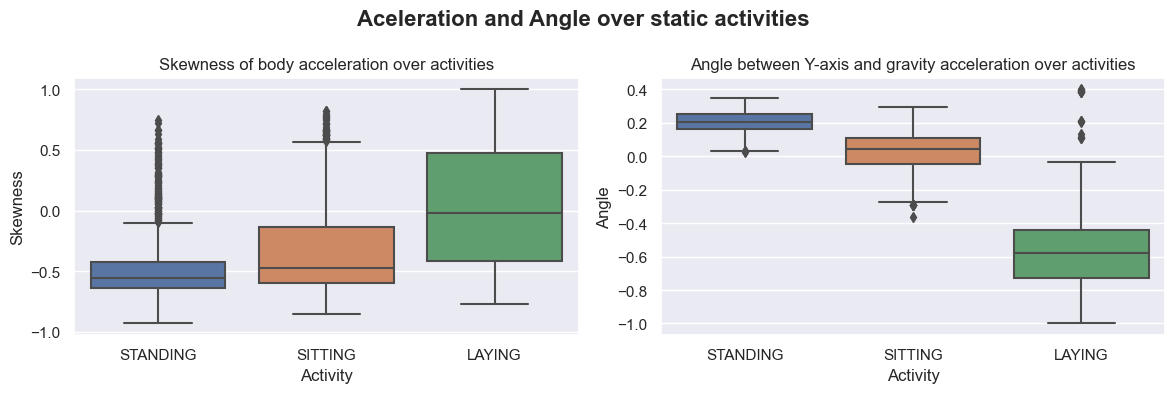

In [180]:
fig, axs = plt.subplots(1, 2, figsize=(12,4)) #создаем сетку для графиков
fig.suptitle('Aceleration and Angle over static activities', fontsize=16, fontweight="bold") #добавляем заголовок

ax = axs[0]
ax= sns.boxplot(x="Activity", y="fBodyAcc-skewness()-X", data=static, ax=ax)
ax.set(ylabel='Skewness', title="Skewness of body acceleration over activities")
ax = axs[1]
ax= sns.boxplot(x="Activity", y="angle(Y,gravityMean)", data=static[static["fBodyAcc-skewness()-X"] < -0.376], ax=ax)
ax.set(ylabel='Angle', title="Angle between Y-axis and gravity acceleration over activities")

fig.tight_layout()
plt.show()

In [ ]:
'''
1. При построении графика просто на основе "fBodyAcc-skewness()-X" тяжело сделать какие-либо выводы,
т.к в категориях standing и sitting очень много выбросов и значения очень разбросаны -> категории
не разделимы по данному признаку.

2. Если взять только те строки, где fBodyAcc-skewness()-X < -0.376, и теперь вывести боксплот распределения 
angle(Y,gravityMean) по разным активностям, то можно выделить категорию laying. 
Полагаю, что из-за положения тела в общем случае угол между осью Y и усредненной гравитационной составляющей ускорения
меньше чем при других статических активностях. Однако в данной категории есть выбросы и разброс значений, довольно большой, 
вероятно, из-за различного положения тела.

3. Laying мы уже выделили по другому параметру, поэтому с помощью данной метрики можно попробовать выделять
sitting, предполагая, что "angle(Y,gravityMean)" при ["fBodyAcc-skewness()-X"] < -0.376 будет находиться
в отрезке от -0.2 до 0.1
'''

Поздравляем, теперь вы на шажок ближе к тому, чтобы стать решающим деревом!

### Задание 14 (1 балл)

Вот и осталась лишь одна активность, которую мы никак не выделили. Попробуем и ее какими-то порогами отделить от всех остальных. Да, можно было бы сказать, что, раз уж мы выделили 5 из 6 категорий, то все остальное - это и есть последняя категория, но мы не идем легкими путями. Выделить оставшуюсь категорию с хорошим качеством не так уж и просто. Из доступных признаков, сначала посмотрите на распределение `tBodyAcc-max()-X` на динамических активностях (скрипичная диаграмма отлично подойдет). 

А теперь спускаем вам порог `tBodyAcc-max()-X < 0.157`. Для таких строк постройте диаграмму рассеяния для признака `tGravityAcc-min()-X`. Да, получается неидеально, но это честная работа. Можно выбрать порог так, чтобы чисто из таблицы с динамическими активностями из строк, где `tBodyAcc-max()-X < 0.157`, выбрать по некоторому порогу для `tGravityAcc-min()-X` строки так, чтобы доля правильных ответов на оставшейся категории была не меньше 83%!

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.violinplot
- sns.swarmplot (иногда лучше подходит, чем просто sns.scatterplot)

Обратите внимание, что подписи к осям можно убирать методами plt. Например, если у вас общее название для оси Y для обоих графиков, то можно не подписывать ось Y у второго графика.

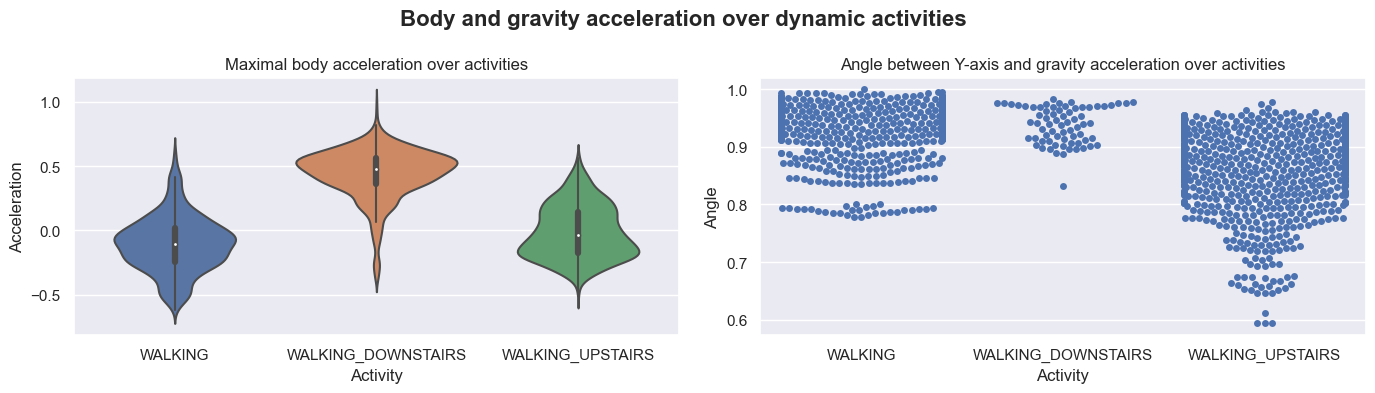

In [183]:
fig, axs = plt.subplots(1, 2, figsize=(14,4)) #создаем сетку для графиков
fig.suptitle('Body and gravity acceleration over dynamic activities', fontsize=16, fontweight="bold") #добавляем заголовок

ax = axs[0]
ax = sns.violinplot(x="Activity", y="tBodyAcc-max()-X", data=dynamic, ax=ax)
ax.set(ylabel='Acceleration', title="Maximal body acceleration over activities")
ax = axs[1]
ax = sns.swarmplot(x="Activity", y="tGravityAcc-min()-X", data=dynamic[dynamic["tBodyAcc-max()-X"] < 0.157], ax=ax)
ax.set(ylabel='Angle', title="Angle between Y-axis and gravity acceleration over activities")

fig.tight_layout()

In [ ]:
'''
Можно заметить, что walking принимает больше верхнихзначений, а walking upstairs нижних
Вывод: можно попробовать искать walking в промежутке от 0.9 до 1 при ["tBodyAcc-max()-X"] < 0.157
'''

### Задание 15 (0.5 балла)

Теперь попробуем более интерактивные графики. Установите библиотеку `plotly` (обычно `pip install plotly` или `conda install plotly`). Синтаксис очень похож на `seaborn`, но вот [документация для plotly.express](https://plotly.com/python-api-reference/plotly.express.html). 

Сначала подготовим данные для визуализации. Будем считать t-SNE просто "черным ящиком", который принимает наши данные и проецирует их в двумерное или трехмерное пространство. Возможно, придется немного подождать.

In [184]:
!pip install plotly

In [200]:
import plotly.express as px
import plotly.graph_objects as go

In [188]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(random_state=666, n_components=2)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_2_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y']),
    train['Activity']
], axis=1)

tsne = TSNE(random_state=666, n_components=3)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_3_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y', 'z']),
    train['Activity']
], axis=1)

CPU times: total: 20min 20s
Wall time: 3min 5s


Теперь нарисуйте scatter-график через `plotly.express` для `df_2_comp` с выделением цветами активностей. Красиво получилось? Видны скопления точек одного цвета? Можно разные активности отделить линиями на данном графике?

In [204]:
fig = px.scatter(df_2_comp, x='x', y='y', color='Activity')
fig.show() #скопления видны, категории различимы

Мы не отстаем от трендов и тоже можем в 3D. Сейчас и вы научитесь (если еще не умеете). Нарисуйте scatter_3d-график через `plotly.express` для `df_3_comp` с выделением цветами активностей. Повращайте его. Нормально получилось? Есть ли какая-то структура у точек?

In [191]:
fig = px.scatter_3d(df_3_comp, x="x", y="y", z="z", color="Activity")
fig.show()
#категории различимы, в основном точки скапливаются в 1 месте, но есть и те, что перемешиваюся (например, standing и sitting)

### Задание 16 (1 балл)

Мы сделали вам fit. Ваша очередь сделать predict. Допишите функцию, которая принимает на вход датафрейм с признаками, а выдает вектор из предсказаний - для каждой строки датафрейма вы определяете, к какому классу принадлежит объект. Рекомендуем сразу записывать из строками, а не кодировать в числа. Дальше фукнция `accuracy_score` выдаст вам долю правильных ответов.

Подсказка: вы уже отделили категории друг от друга по каким-то признакам. Воспользуйтесь этим знанием! Используя только проведенный вами анализ можно спокойно выбить не менее 75% на train и test! Если вы получите меньше 75%, то балл будет снижен. Авторское решение (на основе всех графиков выше) выбивает 81% и 77% на train и test соответственно. [Шапргалка с готовыми идеями для такой задачи](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

In [255]:
def make_predict(a, b, c, x, y, z):
    if a > 0:
        return "LAYING"
    if b > 0.15:
        return "WALKING_DOWNSTAIRS"
    if c > 0.15:
        return "STANDING"
    if x > 0.35:
        return "WALKING_UPSTAIRS"
    if y > -0.2 and y < 0.1 and z < -0.376:
        return "SITTING"
    else:
        return "WALKING"

def predict(df: pd.DataFrame):
    df["predict"] = np.vectorize(make_predict)(df["angle(X,gravityMean)"], df["tBodyAcc-max()-X"], df["angle(Y,gravityMean)"],
                                              df["fBodyAcc-bandsEnergy()-1,8.2"], df["angle(Y,gravityMean)"], df["fBodyAcc-skewness()-X"])
    return df["predict"]

def accuracy_score(y_true, y_pred) -> float:
    y_true = np.asarray(y_true).reshape(-1, 1)
    y_pred = np.asarray(y_pred).reshape(-1, 1)
    return (y_true == y_pred).mean()

In [256]:
train_preds = predict(train)
test_preds = predict(test)
print(f"Accuracy on train set => {accuracy_score(train['Activity'], train_preds)}")
print(f"Accuracy on test set => {accuracy_score(test['Activity'], test_preds)}")

Accuracy on train set => 0.5534548422198041
Accuracy on test set => 0.5558194774346793


__Место для мема и/или фидбэка__